In [146]:
import sys
sys.path.append('../../src/')
import os

# User Libraries
import stats.timeseries as ts
import stats.helpers as shelp
import visual.timeseries as vts

In [26]:
import pandas as pd

In [27]:
main_path = "/home/kunal/tscc_projects/tanner/"
rnaseq_path = "data/family3/rna-seq/bcbio_03202015/"
rnaseq_path = os.path.join(main_path, rnaseq_path)

In [29]:
!ls -lh $rnaseq_path/

total 24M
drwxrwxr-x 1 131998 7592    9 Oct  6 03:36 001_002_RNA_Blood_Scripps-10-1_02-02-15
drwxrwxr-x 1 131998 7592    9 Oct  6 03:33 001_002_RNA_Blood_Scripps-1_09-25-14
drwxr-xr-x 1 131998 7592    8 Oct  6 03:37 001_002_RNA_Blood_Scripps-11-1_03-17-15
drwxr-xr-x 1 131998 7592    8 Oct  6 03:38 001_002_RNA_Blood_Scripps-12-1_04-06-15
drwxr-xr-x 1 131998 7592    8 Oct  6 03:38 001_002_RNA_Blood_Scripps-13-1_05-11-15
drwxr-xr-x 1 131998 7592    8 Oct  6 03:39 001_002_RNA_Blood_Scripps-14-1_06-10-15
drwxr-xr-x 1 131998 7592    7 Oct  6 03:39 001_002_RNA_Blood_Scripps-15-1_07-02-15
drwxr-xr-x 1 131998 7592    7 Oct  6 03:39 001_002_RNA_Blood_Scripps-16-1_08-10-15
drwxrwxr-x 1 131998 7592    9 Oct  6 03:33 001_002_RNA_Blood_Scripps-5_10-29-14
drwxrwxr-x 1 131998 7592    9 Oct  6 03:34 001_002_RNA_Blood_Scripps-7_11-25-14
drwxrwxr-x 1 131998 7592    9 Oct  6 03:35 001_002_RNA_Blood_Scripps-9-1_12-19-14
drwxrwxr-x 1 131998 7592    9 Oct  6 03:40 001_003_RNA_Blood_Scripps-2_09-25-14
drwxrwx

In [30]:
aggregated_count_path = os.path.join(rnaseq_path,
                                     "853005_Tanner_RNASeq")

In [32]:
!ls -lh $aggregated_count_path

total 118M
-rw-r--r-- 1 131998 7592 3.7M Oct  6 03:43 annotated_combined.counts
-rwxrwxr-x 1 131998 7592 454K Oct  6 03:43 bcbio-nextgen-commands.log
-rwxrwxr-x 1 131998 7592 339K Oct  6 03:43 bcbio-nextgen.log
-rw-r--r-- 1 131998 7592 3.1M Oct  6 03:43 combined.counts
-rw-r--r-- 1 131998 7592  35M Oct  6 03:43 combined.dexseq
-rw-r--r-- 1 131998 7592 6.5M Oct  6 03:43 combined.fpkm
-rw-r--r-- 1 131998 7592  28M Oct  6 03:43 combined.isoform.fpkm
-rw-r--r-- 1 131998 7592  11M Oct  6 19:06 deseq.counts
-rw-r--r-- 1 131998 7592  15M Oct  6 19:07 deseq.regularized.log.counts
-rw-r--r-- 1 131998 7592  17M Oct  6 19:09 deseq.variance.stablized.counts
-rwxrwxr-x 1 131998 7592  776 Oct  6 03:43 programs.txt
-rwxrwxr-x 1 131998 7592  47K Oct  6 03:43 project-summary.yaml


### Load in the counts

In [34]:
count_file = os.path.join(aggregated_count_path, "combined.fpkm")
annotated_file = os.path.join(aggregated_count_path, 
                              "annotated_combined.counts")
deseq_file = os.path.join(aggregated_count_path, 
                        "deseq.counts")
deseq_rl_file = os.path.join(aggregated_count_path, 
                           "deseq.regularized.log.counts")
deseq_vs_file = os.path.join(aggregated_count_path, 
                           "deseq.variance.stabilized.counts")

In [55]:
count_df = pd.read_table(count_file, index_col=0)
annotated_df = pd.read_table(annotated_file, index_col=0)

In [62]:
deseq_df = pd.read_table(deseq_file, sep="\t")
deseq_df.columns = count_df.columns

In [65]:
def add_symbol(df):
    df['symbol'] = annotated_df.ix[df.index]['symbol']
    return df

In [66]:
deseq_df = add_symbol(deseq_df)
count_df = add_symbol(count_df)

### Interesting p53 Trends

In [67]:
interesting_p53 = ['TP53', 'TP53TG3B', 'TP53I11']

In [74]:
def subset_df(df,
              sample_id='001_002',
              interesting_genes = ['TP53', 'TP53TG3B', 'TP53I11']):
    subset_df = df[df['symbol'].isin(interesting_genes)].T
    subset_df.columns = subset_df.ix['symbol']
    sample_subset = lambda x: x.find(sample_id) != -1
    subset_df = subset_df[subset_df.index.map(sample_subset)]
    subset_df.index = pd.to_datetime(subset_df.index.map(lambda x: x.split('_')[-1]))
    return subset_df

In [76]:
count_p53 = subset_df(count_df, )
deseq_p53 = subset_df(deseq_df)

In [72]:
import seaborn as sns
%pylab inline
sns.set_context("talk", font_scale=1.2)
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


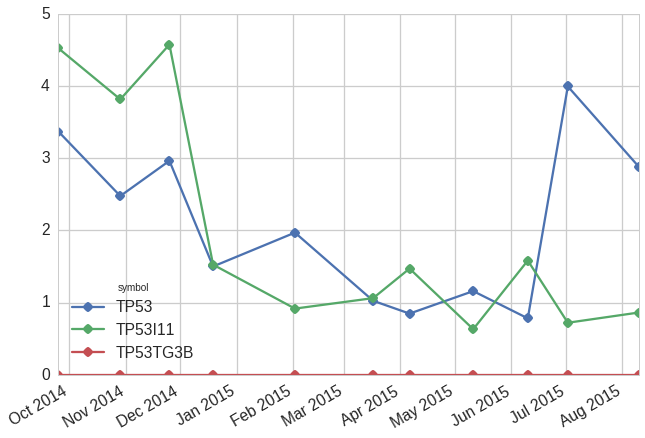

In [77]:
count_p53.plot(marker='o')

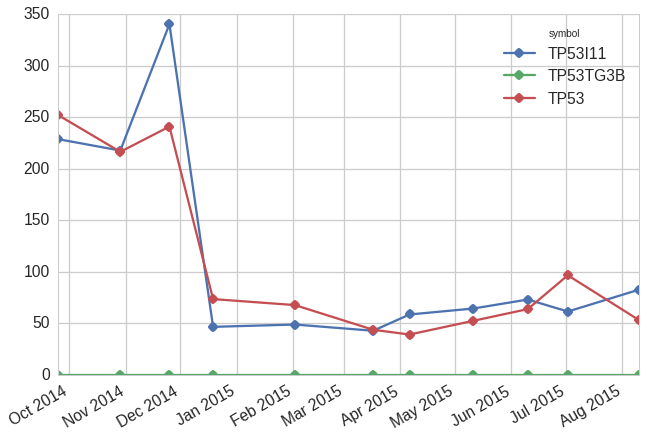

In [78]:
deseq_p53.plot(marker='o')

#### Based on the DESeq results, and the results showing that the three samples before Dec 19, 2014 have batch effects, there doesn't seem to be an apparent elevated p53 signal.'

#### Let's just look at all the the p53 genes after the first 3 timepoints

In [135]:
interesting_genes = annotated_df.symbol[annotated_df.symbol.str.contains('TP53')]
interesting_genes = [x for x in interesting_genes
                     if x != 'TP53TG3B']

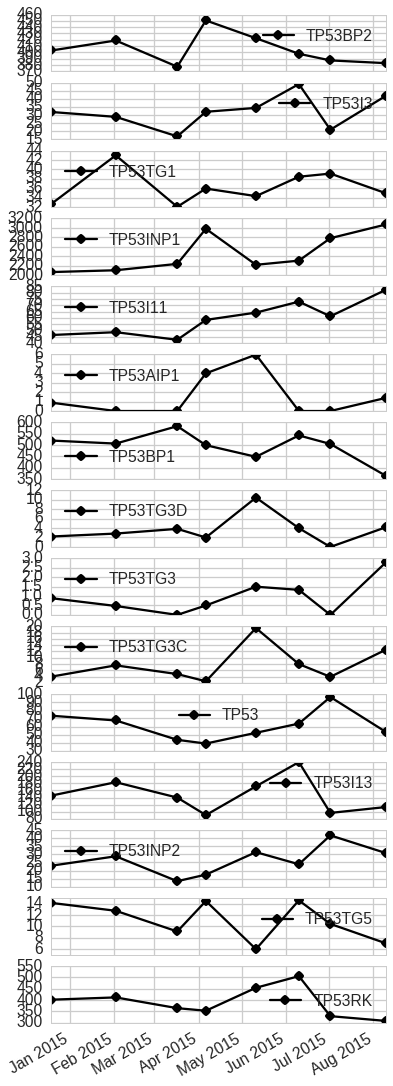

In [136]:
deseq_allp53 = subset_df(deseq_df, interesting_genes=interesting_genes)
deseq_allp53 = deseq_allp53.ix[3:]
deseq_allp53.plot(marker='o', subplots=True, figsize=(6, 20));

In [132]:
import stats.timeseries as ts
reload(ts)

<module 'stats.timeseries' from '../../src/stats/timeseries.pyc'>

In [137]:
outliers = ts.outliers(deseq_allp53)

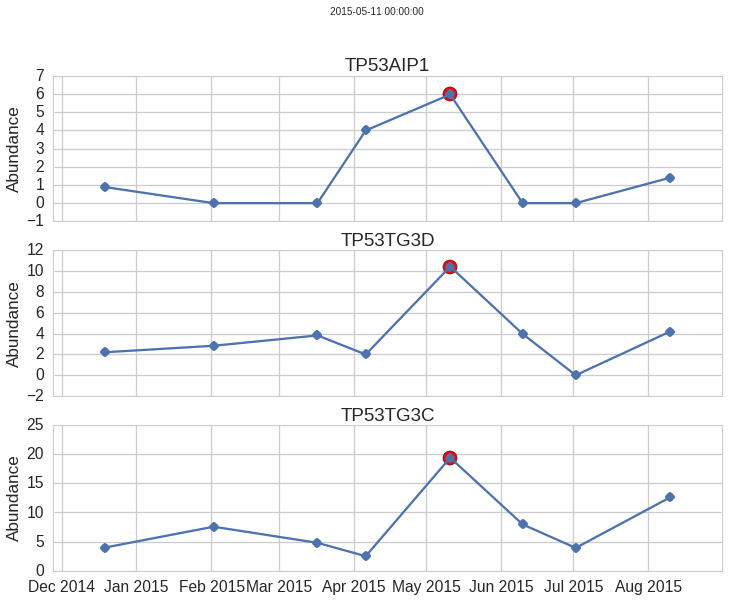

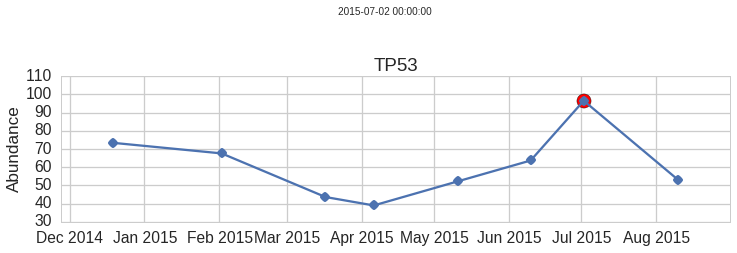

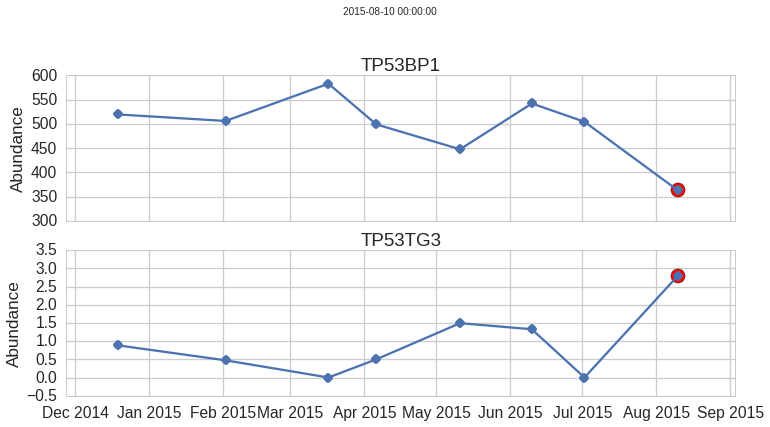

In [138]:
for sample, classification in outliers.iteritems():
    if len(classification) > 0:
        figs = vts.default(deseq_allp53[classification], main_title=sample, marksample=sample)

In [153]:
reload(vts)

<module 'visual.timeseries' from '../../src/visual/timeseries.py'>

P values: 


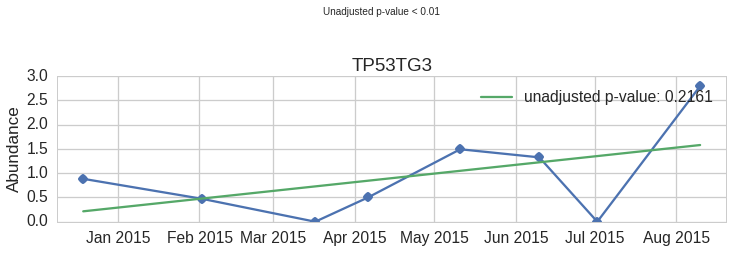

In [154]:
print 'P values: '
pvalues = ts.regress(deseq_allp53)
vts.default(deseq_allp53[pvalues[pvalues < 1e-02].index], 
            main_title='Unadjusted p-value < 0.01', bestfit=True)

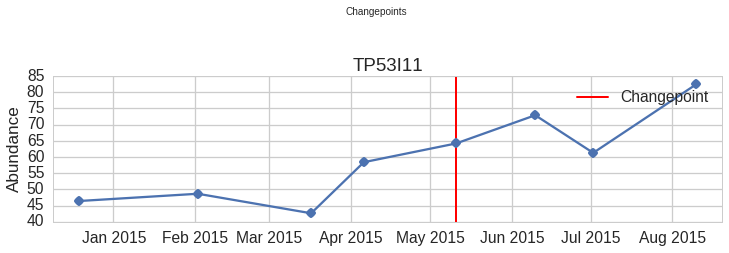

In [158]:
changepoints = ts.changepoints(deseq_allp53, window_size=3)
changepoints = changepoints[changepoints > 0]
figs = vts.default(deseq_allp53[changepoints.index], main_title='Changepoints',
                   changepoints=changepoints.values)